# BOOM BIKES Case Study

This Liner Regrssion model will be built in below steps:

1. EDA, Reading, Understanding & Visualising the data
2. Preparing the data for modeling
3. Training the model
4. Residual Analysis
5. Predictions & evaluation on the test set
6. Final Summary

In [1]:
# Import Libraries for the model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## <span style='color:BLUE'> STEP 1 - Reading, Understanding, Visualising & Perform EDA.  </span>
- Importing the dataset
- Looking for NAN Values & Datatypes in the dataset
- Dropping columns that are irrelevant
- Outlier detection and elimination for continuous variables coloumns
- Visualizing numeric/continuous variables
- Visualizing categorical variables

In [2]:
# --Read original database:
boom=pd.read_csv('day.csv')
print("Dataset Shape: {}".format(boom.shape))
boom.head()

Dataset Shape: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# To Understand "NaN values in all coloumns" & "Datatypes in each columns"
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# To drop columns that are irrelevant:
boom.drop(['instant', 'casual', 'registered', 'dteday'], inplace=True, axis=1)

<AxesSubplot:>

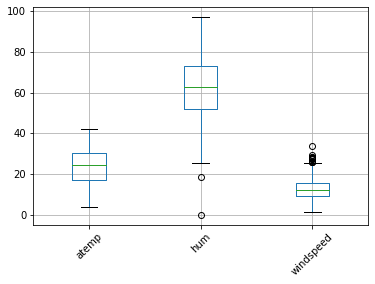

In [5]:
# To determine outliers in continuous varibale columns useing box plots:
boom.boxplot(column=['atemp', 'hum', 'windspeed'], rot=45)

<AxesSubplot:>

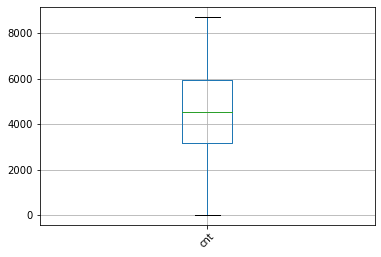

In [6]:
# To determine outliers in continuous varibale columns useing box plots:
boom.boxplot(column=['cnt'], rot=45)

<AxesSubplot:>

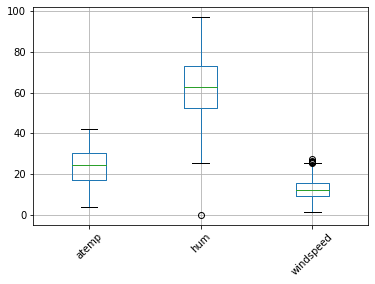

In [7]:
# To delete outliers in continus varibale coloumns which are above 99 percentile.
out_lier_1 = boom["windspeed"].quantile(0.99)
boom= boom[boom["windspeed"] < out_lier_1]
boom.boxplot(column=['atemp', 'hum', 'windspeed'], rot=45)

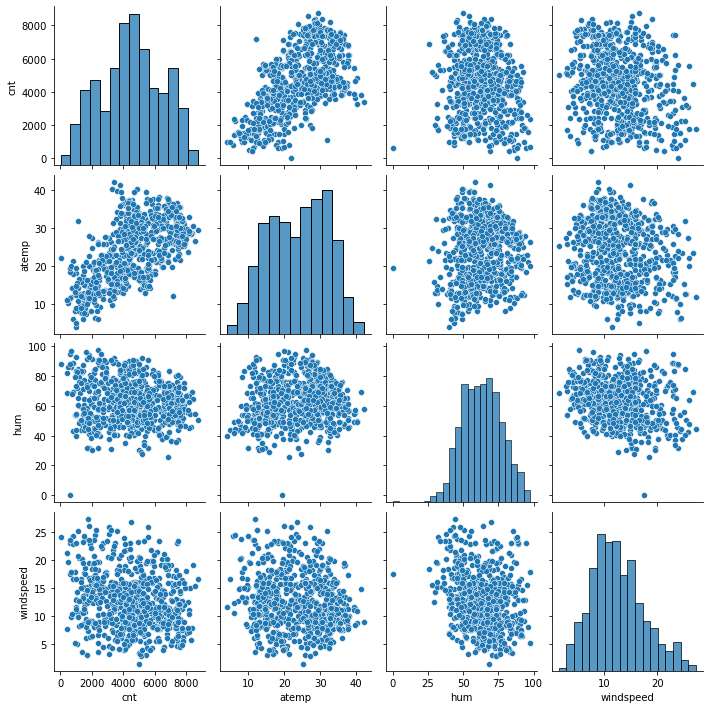

In [8]:
# To visualise Continous Variables and their relationship:
sns.pairplot(boom, x_vars=["cnt", "atemp", "hum", "windspeed"], y_vars=["cnt", "atemp", "hum", "windspeed"])


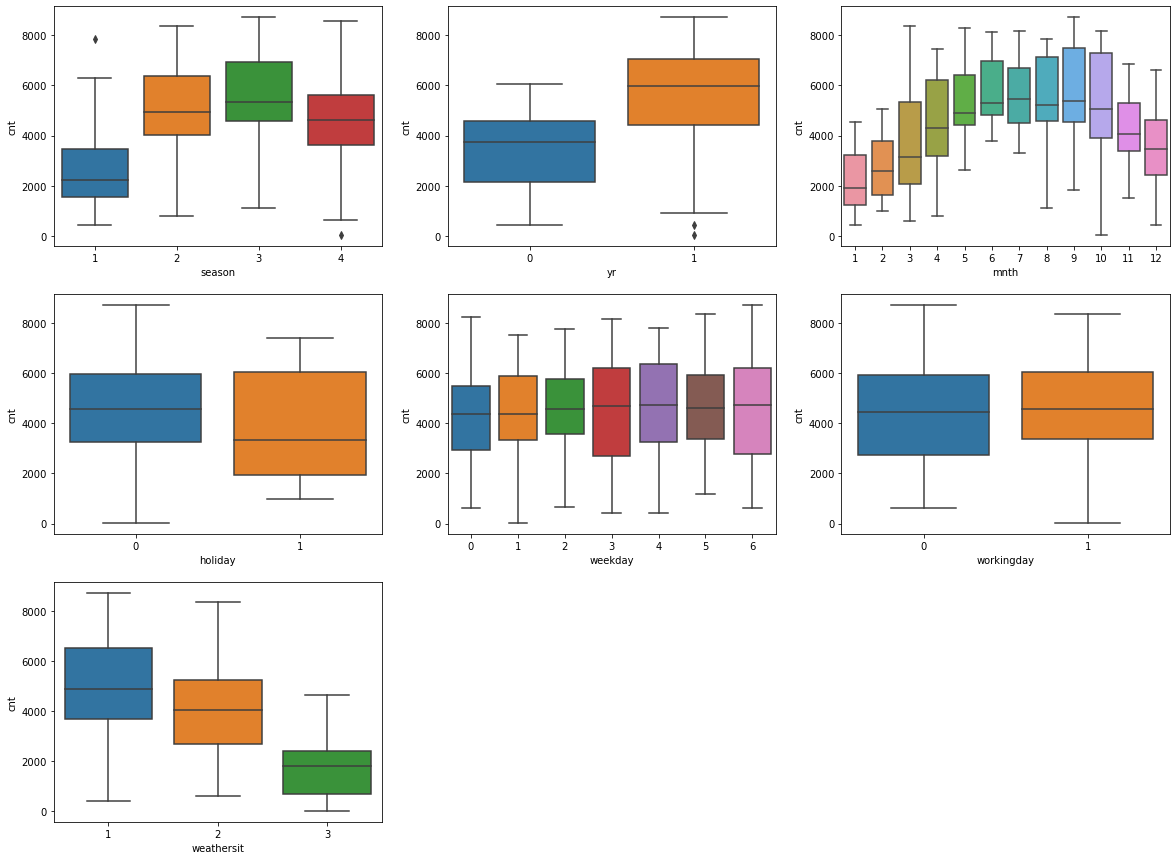

In [9]:
# To visualise Categorical Variables and their relationship:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=boom)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=boom)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=boom)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=boom)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=boom)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=boom)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=boom)
plt.show()

______________________________________________________________________________________________________________________

## <span style='color:BLUE'> STEP 2 - Preparing the Data for modeling </span>
- Encoding:
    - Converting continus to categorical variables
    - Creating Dummy Variables with the categorical variables
    - Deleting unwanted columns after creating dummy variables out of it.
- Splitting into train and test
- Rescalling of variables

### <span style='color:RED'> -- Encoding: </span>

In [10]:
boom['mnth'] = boom['mnth'].apply(lambda x: calendar.month_abbr[x])

In [11]:
# Creating Dummy Variables for mnth - column:
months= pd.get_dummies(boom['mnth'], drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [12]:
# Adding the new dummy varibales to the main dataset:
boom= pd.concat([boom, months], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [13]:
def weekdays_map(x):
    dict_weekday= {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}
    return dict_weekday[x]
boom['weekday'] = boom['weekday'].apply(weekdays_map)

In [14]:
# Creating Dummy Variables for "weekday" - column:
week= pd.get_dummies(boom['weekday'],drop_first=True)
week.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [15]:
# Adding the new dummy varibales to the main dataset:
boom= pd.concat([boom, week], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
0,1,0,Jan,0,sat,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,1,0,Jan,0,sun,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,1,0,Jan,0,mon,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,Jan,0,tue,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,1,0,Jan,0,wed,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [16]:
def sea_sons_map(x):
    dict_sea_sons= {1:'spring',2:'summer',3:'fall',4:'winter'}
    return dict_sea_sons[x]
boom['season'] = boom['season'].apply(sea_sons_map)

In [17]:
# Creating Dummy Variables for "season" - column:
seasons= pd.get_dummies(boom['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
# Adding the new dummy varibales to the main dataset:
boom= pd.concat([boom, seasons], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sep,mon,sat,sun,thu,tue,wed,spring,summer,winter
0,spring,0,Jan,0,sat,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,1,0,0
1,spring,0,Jan,0,sun,0,2,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,1,0,0
2,spring,0,Jan,0,mon,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,tue,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,1,0,0
4,spring,0,Jan,0,wed,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,1,0,0


In [19]:
def weathers_map(x):
    dict_weathers= {1:'C/FCl/PCl',2:'MCl/MBCl/MFCl/M',3:'LSnow/LrTsScl/LrScl',4:'HrIpTsMsFg'}
    return dict_weathers[x]
boom['weathersit'] = boom['weathersit'].apply(weathers_map)

In [20]:
# Creating Dummy Variables for "weathersit" - column:
weathers=pd.get_dummies(boom['weathersit'], drop_first=True)
weathers.head()

,LSnow/LrTsScl/LrScl,MCl/MBCl/MFCl/M
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [21]:
# Adding the new dummy varibales to the main dataset:
boom= pd.concat([boom, weathers], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,spring,summer,winter,LSnow/LrTsScl/LrScl,MCl/MBCl/MFCl/M
0,spring,0,Jan,0,sat,0,MCl/MBCl/MFCl/M,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,sun,0,MCl/MBCl/MFCl/M,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,mon,1,C/FCl/PCl,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,tue,1,C/FCl/PCl,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,spring,0,Jan,0,wed,1,C/FCl/PCl,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


In [22]:
# Deleting unwanted columns after creating dummy variables out of it:
boom.drop(['season', 'mnth', 'weekday', 'weathersit', 'temp'], inplace=True, axis=1)

### <span style='color:RED'> -- Splitting into Train & Test Datasets: </span>

In [23]:
# Splitting the data set into test and train:
df_train, df_test = train_test_split(boom, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(505, 29)
(217, 29)


### <span style='color:RED'> -- Rescalling the Features: </span>

In [24]:
# Instantiate an object for scaler:
scaler = MinMaxScaler()

# Create a list of numeric variables:
num_variable = ['atemp', 'hum', 'windspeed', 'cnt']

# Fit on Data
df_train[num_variable]= scaler.fit_transform(df_train[num_variable])


In [25]:
# To check if the feature scalling has been completed with Min Max Scaller:
df_train[num_variable].describe()

,atemp,hum,windspeed,cnt
count,505.000000,505.000000,505.000000,505.000000
mean,0.526364,0.656910,0.395486,0.535753
std,0.214265,0.146014,0.203170,0.236117
min,0.000000,0.000000,0.000000,0.000000
25%,0.338458,0.552699,0.245292,0.368465
50%,0.540441,0.655956,0.369672,0.537770
75%,0.701838,0.757926,0.516162,0.721942
max,1.000000,1.000000,1.000000,1.000000


______________________________________________________________________________________________________________________

## <span style='color:BLUE'> STEP 3 - Training the model </span>

<AxesSubplot:>

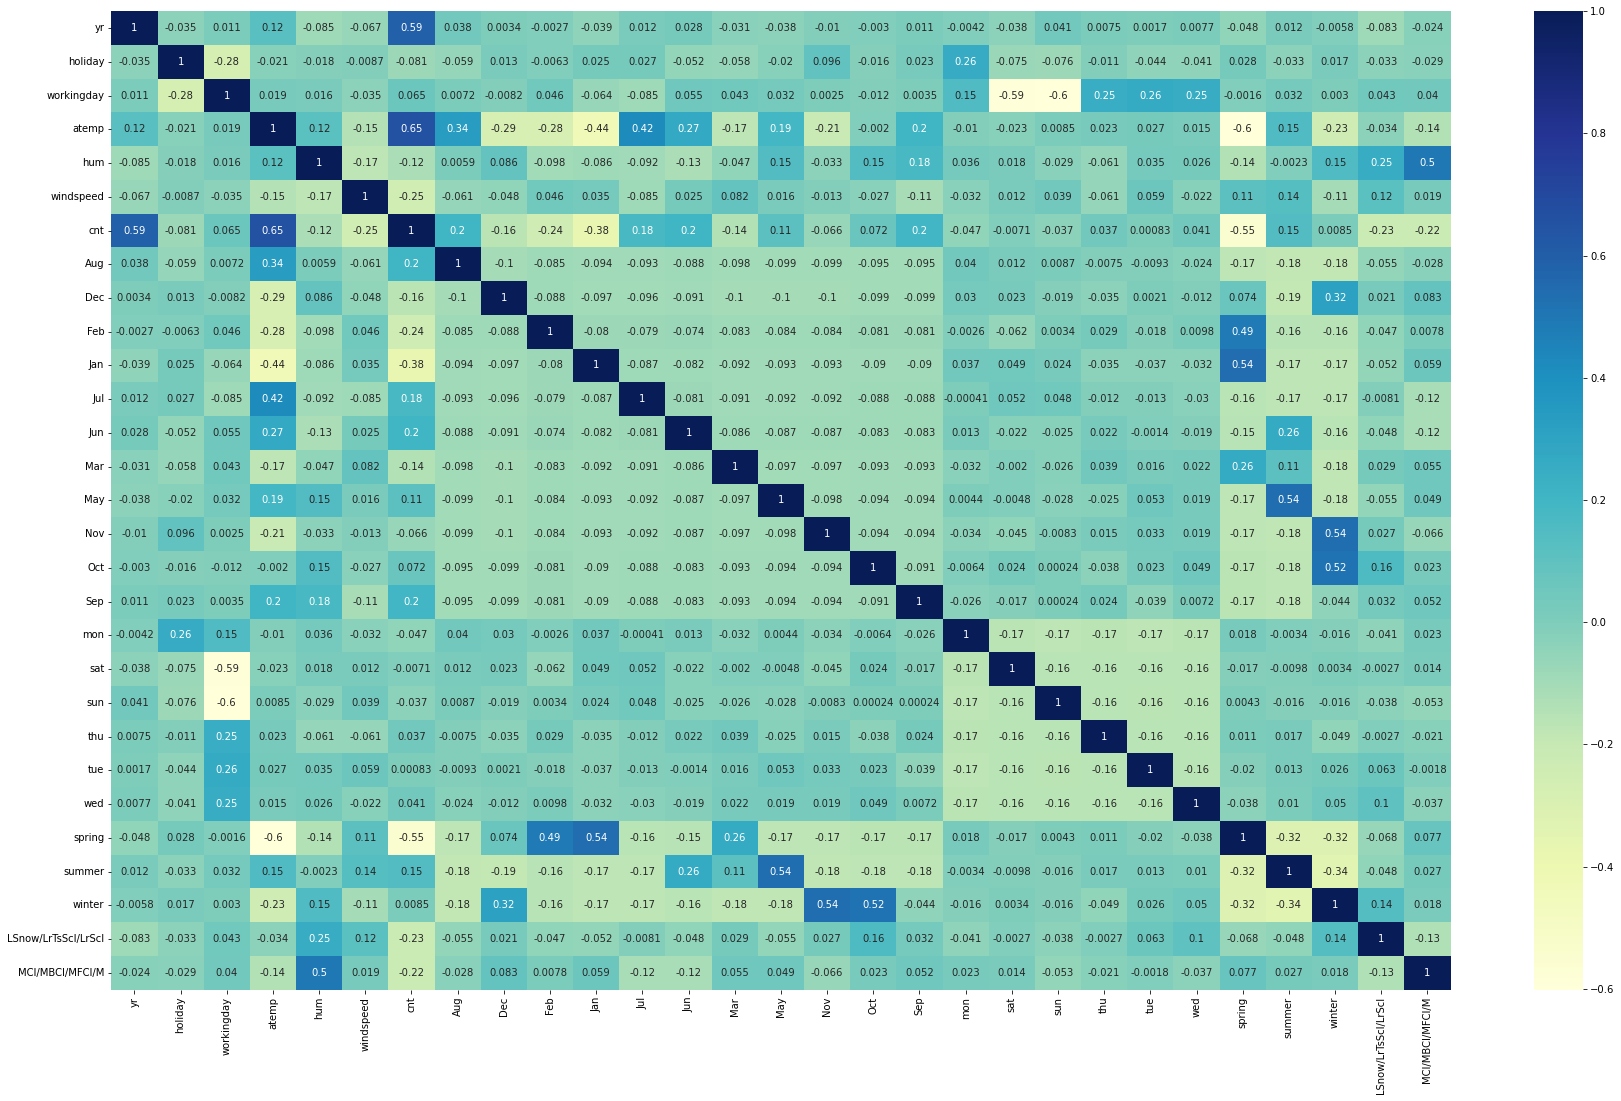

In [26]:
# To start by creating a heat map:
plt.figure(figsize = (30,18))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")


In [27]:
# creating X_train & y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
# Running RFE with the output number of variables equal to 15:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [29]:
# Fetching the list of features selected by the RFE model as per ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 9),
 ('Jul', False, 5),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 6),
 ('tue', False, 4),
 ('wed', False, 7),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('LSnow/LrTsScl/LrScl', True, 1),
 ('MCl/MBCl/MFCl/M', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Aug',
       'Dec', 'Jun', 'Mar', 'May', 'Nov', 'Sep', 'sat', 'sun', 'spring',
       'summer', 'winter', 'LSnow/LrTsScl/LrScl', 'MCl/MBCl/MFCl/M'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['Feb', 'Jan', 'Jul', 'Oct', 'mon', 'thu', 'tue', 'wed'], dtype='object')

### <span style='color:RED'> -- MODEL 1.0: </span>

In [32]:
#creating X_test dataframe with RFE Selected Variables"
X_train_rfe = X_train[col]

In [33]:
# Adding a constant varibale:
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
# Running the linear model:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.29e-177
Time:                        22:19:43   Log-Likelihood:                 472.00
No. Observations:                 505   AIC:                            -904.0
Df Residuals:                     485   BIC:                            -819.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2738      0.032      8.674      0.000       0.212       0.336
yr                      0.2334      0.009     26.269      0.000       0.216       0.251
holiday                 0.0254      0.021      1.199      0.231      -0.016       0.067
workingday              0.0969      0.011      9.171      0.000       0.076       0.118
atemp                   0.4565      0.040     11.283      0.000       0.377       0.536
hum                    -0.2003      0.042     -4.813      0.000      -0.282      -0.119
windspeed              -0.1250      0.023     -5.473      0.000      -0.170      -0.080
Aug                     0.0405      0.020      2.050      0.041       0.002       0.079
Dec                    -0.0367      0.018     -2.089      0.037      -0.071      -0.002
Jun                     0.0343      0.020      1.700      0.090      -0.005       0.074
Mar                     0.0337      0.017      1.978      0.048       0.000       0.067
May                     0.0365      0.021      1.774      0.077      -0.004       0.077
Nov                    -0.0681      0.020     -3.352      0.001      -0.108      -0.028
Sep                     0.1046      0.019      5.406      0.000       0.067       0.143
sat                     0.1020      0.013      7.904      0.000       0.077       0.127
sun                     0.0495      0.013      3.747      0.000       0.024       0.076
spring                 -0.1005      0.025     -4.082      0.000      -0.149      -0.052
summer                  0.0341      0.020      1.675      0.095      -0.006       0.074
winter                  0.1090      0.020      5.352      0.000       0.069       0.149
LSnow/LrTsScl/LrScl    -0.2469      0.029     -8.458      0.000      -0.304      -0.190
MCl/MBCl/MFCl/M        -0.0560      0.012     -4.844      0.000      -0.079      -0.033
==============================================================================
Omnibus:                       82.007   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.376
Skew:                          -0.863   Prob(JB):                     1.51e-40
Kurtosis:                       5.395   Cond. No.                     1.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <span style='color:RED'> -- MODEL 1.1: </span>

In [35]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new = X_train_rfe.drop(["holiday"], axis=1)

In [36]:
# Rebuilding the model again:
X_train_lm = sm.add_constant(X_train_new)

In [37]:
# Running the linear model:
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.29e-177
Time:                        22:19:43   Log-Likelihood:                 472.00
No. Observations:                 505   AIC:                            -904.0
Df Residuals:                     485   BIC:                            -819.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2991      0.046      6.496      0.000       0.209       0.390
yr                      0.2334      0.009     26.269      0.000       0.216       0.251
workingday              0.0715      0.024      2.920      0.004       0.023       0.120
atemp                   0.4565      0.040     11.283      0.000       0.377       0.536
hum                    -0.2003      0.042     -4.813      0.000      -0.282      -0.119
windspeed              -0.1250      0.023     -5.473      0.000      -0.170      -0.080
Aug                     0.0405      0.020      2.050      0.041       0.002       0.079
Dec                    -0.0367      0.018     -2.089      0.037      -0.071      -0.002
Jun                     0.0343      0.020      1.700      0.090      -0.005       0.074
Mar                     0.0337      0.017      1.978      0.048       0.000       0.067
May                     0.0365      0.021      1.774      0.077      -0.004       0.077
Nov                    -0.0681      0.020     -3.352      0.001      -0.108      -0.028
Sep                     0.1046      0.019      5.406      0.000       0.067       0.143
sat                     0.0766      0.027      2.874      0.004       0.024       0.129
sun                     0.0242      0.026      0.914      0.361      -0.028       0.076
spring                 -0.1005      0.025     -4.082      0.000      -0.149      -0.052
summer                  0.0341      0.020      1.675      0.095      -0.006       0.074
winter                  0.1090      0.020      5.352      0.000       0.069       0.149
LSnow/LrTsScl/LrScl    -0.2469      0.029     -8.458      0.000      -0.304      -0.190
MCl/MBCl/MFCl/M        -0.0560      0.012     -4.844      0.000      -0.079      -0.033
==============================================================================
Omnibus:                       82.007   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.376
Skew:                          -0.863   Prob(JB):                     1.51e-40
Kurtosis:                       5.395   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:RED'> -- MODEL 1.2: </span>

In [38]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new1 = X_train_new.drop(["sun"], axis=1)

In [39]:
# Rebuilding the model again:
X_train_lm1 = sm.add_constant(X_train_new1)

In [40]:
# Running the linear model:
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.63e-178
Time:                        22:19:43   Log-Likelihood:                 471.57
No. Observations:                 505   AIC:                            -905.1
Df Residuals:                     486   BIC:                            -824.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3195      0.040      7.930      0.000       0.240       0.399
yr                      0.2339      0.009     26.368      0.000       0.216       0.251
workingday              0.0518      0.012      4.442      0.000       0.029       0.075
atemp                   0.4545      0.040     11.251      0.000       0.375       0.534
hum                    -0.1998      0.042     -4.802      0.000      -0.282      -0.118
windspeed              -0.1245      0.023     -5.453      0.000      -0.169      -0.080
Aug                     0.0413      0.020      2.093      0.037       0.003       0.080
Dec                    -0.0375      0.018     -2.138      0.033      -0.072      -0.003
Jun                     0.0353      0.020      1.752      0.080      -0.004       0.075
Mar                     0.0345      0.017      2.029      0.043       0.001       0.068
May                     0.0372      0.021      1.805      0.072      -0.003       0.078
Nov                    -0.0701      0.020     -3.473      0.001      -0.110      -0.030
Sep                     0.1042      0.019      5.388      0.000       0.066       0.142
sat                     0.0569      0.016      3.642      0.000       0.026       0.088
spring                 -0.1016      0.025     -4.130      0.000      -0.150      -0.053
summer                  0.0335      0.020      1.645      0.101      -0.007       0.074
winter                  0.1092      0.020      5.367      0.000       0.069       0.149
LSnow/LrTsScl/LrScl    -0.2468      0.029     -8.456      0.000      -0.304      -0.189
MCl/MBCl/MFCl/M        -0.0561      0.012     -4.851      0.000      -0.079      -0.033
==============================================================================
Omnibus:                       84.324   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.963
Skew:                          -0.883   Prob(JB):                     5.62e-42
Kurtosis:                       5.431   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:RED'> -- MODEL 1.3: </span>

In [41]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new2 = X_train_new1.drop(["summer"], axis=1)

In [42]:
# Rebuilding the model again:
X_train_lm2 = sm.add_constant(X_train_new2)

In [43]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.07e-179
Time:                        22:19:43   Log-Likelihood:                 470.17
No. Observations:                 505   AIC:                            -904.3
Df Residuals:                     487   BIC:                            -828.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3512      0.035      9.915      0.000       0.282       0.421
yr                      0.2355      0.009     26.679      0.000       0.218       0.253
workingday              0.0520      0.012      4.451      0.000       0.029       0.075
atemp                   0.4201      0.035     12.134      0.000       0.352       0.488
hum                    -0.1916      0.041     -4.630      0.000      -0.273      -0.110
windspeed              -0.1209      0.023     -5.311      0.000      -0.166      -0.076
Aug                     0.0281      0.018      1.554      0.121      -0.007       0.064
Dec                    -0.0419      0.017     -2.411      0.016      -0.076      -0.008
Jun                     0.0440      0.019      2.256      0.025       0.006       0.082
Mar                     0.0408      0.017      2.458      0.014       0.008       0.073
May                     0.0535      0.018      2.960      0.003       0.018       0.089
Nov                    -0.0758      0.020     -3.805      0.000      -0.115      -0.037
Sep                     0.0916      0.018      5.149      0.000       0.057       0.127
sat                     0.0557      0.016      3.562      0.000       0.025       0.086
spring                 -0.1312      0.017     -7.817      0.000      -0.164      -0.098
winter                  0.0892      0.016      5.463      0.000       0.057       0.121
LSnow/LrTsScl/LrScl    -0.2507      0.029     -8.605      0.000      -0.308      -0.193
MCl/MBCl/MFCl/M        -0.0565      0.012     -4.881      0.000      -0.079      -0.034
==============================================================================
Omnibus:                       88.132   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.771
Skew:                          -0.910   Prob(JB):                     5.64e-45
Kurtosis:                       5.524   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:RED'> -- MODEL 1.4: </span>

In [44]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new3 = X_train_new2.drop(["Aug"], axis=1)

In [45]:
# Rebuilding the model again:
X_train_lm3 = sm.add_constant(X_train_new3)

In [46]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.33e-179
Time:                        22:19:43   Log-Likelihood:                 468.92
No. Observations:                 505   AIC:                            -903.8
Df Residuals:                     488   BIC:                            -832.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3505      0.035      9.879      0.000       0.281       0.420
yr                      0.2353      0.009     26.615      0.000       0.218       0.253
workingday              0.0531      0.012      4.541      0.000       0.030       0.076
atemp                   0.4323      0.034     12.804      0.000       0.366       0.499
hum                    -0.1894      0.041     -4.573      0.000      -0.271      -0.108
windspeed              -0.1217      0.023     -5.339      0.000      -0.166      -0.077
Dec                    -0.0418      0.017     -2.405      0.017      -0.076      -0.008
Jun                     0.0340      0.018      1.844      0.066      -0.002       0.070
Mar                     0.0370      0.016      2.250      0.025       0.005       0.069
May                     0.0441      0.017      2.586      0.010       0.011       0.078
Nov                    -0.0753      0.020     -3.774      0.000      -0.115      -0.036
Sep                     0.0833      0.017      4.902      0.000       0.050       0.117
sat                     0.0566      0.016      3.618      0.000       0.026       0.087
spring                 -0.1350      0.017     -8.116      0.000      -0.168      -0.102
winter                  0.0830      0.016      5.235      0.000       0.052       0.114
LSnow/LrTsScl/LrScl    -0.2527      0.029     -8.670      0.000      -0.310      -0.195
MCl/MBCl/MFCl/M        -0.0563      0.012     -4.854      0.000      -0.079      -0.033
==============================================================================
Omnibus:                       89.691   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.839
Skew:                          -0.928   Prob(JB):                     2.01e-45
Kurtosis:                       5.517   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:RED'> -- MODEL FINAL: </span>

In [47]:
# Dropping Variables after running RFE useing Statsmodel:
X_train_new4 = X_train_new3.drop(["Jun"], axis=1)

In [48]:
# Rebuilding the model again:
X_train_lm4 = sm.add_constant(X_train_new4)

In [49]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     164.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.48e-180
Time:                        22:19:43   Log-Likelihood:                 467.16
No. Observations:                 505   AIC:                            -902.3
Df Residuals:                     489   BIC:                            -834.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3528      0.036      9.928      0.000       0.283       0.423
yr                      0.2350      0.009     26.520      0.000       0.218       0.252
workingday              0.0546      0.012      4.675      0.000       0.032       0.078
atemp                   0.4403      0.034     13.115      0.000       0.374       0.506
hum                    -0.1931      0.041     -4.657      0.000      -0.275      -0.112
windspeed              -0.1201      0.023     -5.261      0.000      -0.165      -0.075
Dec                    -0.0417      0.017     -2.392      0.017      -0.076      -0.007
Mar                     0.0342      0.016      2.080      0.038       0.002       0.066
May                     0.0377      0.017      2.253      0.025       0.005       0.071
Nov                    -0.0756      0.020     -3.778      0.000      -0.115      -0.036
Sep                     0.0779      0.017      4.643      0.000       0.045       0.111
sat                     0.0572      0.016      3.651      0.000       0.026       0.088
spring                 -0.1382      0.017     -8.338      0.000      -0.171      -0.106
winter                  0.0788      0.016      5.010      0.000       0.048       0.110
LSnow/LrTsScl/LrScl    -0.2539      0.029     -8.693      0.000      -0.311      -0.197
MCl/MBCl/MFCl/M        -0.0567      0.012     -4.884      0.000      -0.080      -0.034
==============================================================================
Omnibus:                       86.296   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.989
Skew:                          -0.905   Prob(JB):                     1.24e-42
Kurtosis:                       5.428   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:BLUE'> STEP 4 - Residual Analysis </span>

In [50]:
y_train_pred = lm4.predict(X_train_lm4)

<AxesSubplot:ylabel='Density'>

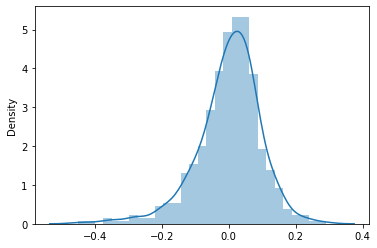

In [51]:
res = y_train - y_train_pred
sns.distplot(res)

## <span style='color:BLUE'> STEP 5 - Predictions & evaluation on the test set </span>

In [52]:
# Transform Test Data Set to start the predictions
# Create a list of numeric variables:
num_variable = ['atemp', 'hum', 'windspeed', 'cnt']

# Fit on Data
df_test[num_variable]= scaler.transform(df_test[num_variable])
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,sat,sun,thu,tue,wed,spring,summer,winter,LSnow/LrTsScl/LrScl,MCl/MBCl/MFCl/M
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.483871,0.018433,0.682028,0.541812,0.625926,0.406065,0.548796,0.073733,0.059908,0.082949,...,0.152074,0.147465,0.147465,0.152074,0.156682,0.258065,0.258065,0.225806,0.027650,0.271889
std,0.500895,0.134823,0.466765,0.226326,0.140811,0.198440,0.222959,0.261940,0.237865,0.276443,...,0.359923,0.355389,0.355389,0.359923,0.364341,0.438581,0.438581,0.419079,0.164346,0.445962
min,0.000000,0.000000,0.000000,0.026455,0.313625,-0.054549,0.050240,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356278,0.517566,0.258910,0.396763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.567477,0.618252,0.393505,0.556235,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746599,0.736336,0.528079,0.706954,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.019437,0.966134,0.943774,1.042206,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# creating X_train & y_train on Test Set:
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# Adding Constant to X_Test DF:
X_test_new = sm.add_constant(X_test)
X_test_new.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,Aug,Dec,Feb,...,sat,sun,thu,tue,wed,spring,summer,winter,LSnow/LrTsScl/LrScl,MCl/MBCl/MFCl/M
200,1.0,0,0,1,0.893589,0.727078,0.195903,0,0,0,...,0,0,0,0,1,0,0,0,0,0
495,1.0,1,0,1,0.591145,0.370609,0.533179,0,0,0,...,0,0,0,0,0,0,1,0,0,0
368,1.0,1,0,1,0.053884,0.426306,0.390081,0,0,0,...,0,0,0,0,1,1,0,0,0,1
629,1.0,1,0,0,0.711117,0.664953,0.660962,0,0,0,...,1,0,0,0,0,0,0,0,0,0
645,1.0,1,1,0,0.412870,0.729648,0.403720,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [61]:
# creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new4.columns]
X_test_new.head()

,const,yr,workingday,atemp,hum,windspeed,Dec,Mar,May,Nov,Sep,sat,spring,winter,LSnow/LrTsScl/LrScl,MCl/MBCl/MFCl/M
200,1.0,0,1,0.893589,0.727078,0.195903,0,0,0,0,0,0,0,0,0,0
495,1.0,1,1,0.591145,0.370609,0.533179,0,0,1,0,0,0,0,0,0,0
368,1.0,1,1,0.053884,0.426306,0.390081,0,0,0,0,0,0,1,0,0,1
629,1.0,1,0,0.711117,0.664953,0.660962,0,0,0,0,1,1,0,0,0,0
645,1.0,1,0,0.412870,0.729648,0.403720,0,0,0,0,0,0,0,1,0,1


In [63]:
# Making predictions
y_pred = lm4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

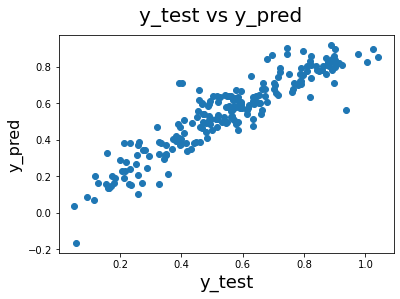

In [64]:
# Plotting y_test & y_pred to understnad the spread:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## <span style='color:BLUE'> STEP 6 - FINAL SUMMARY </span>

The best fitten line for this BoomBikes Liner Regression model equation is:

cnt = (0.2350 X yr) + (0.0546 X workingday) + (0.4403 X atemp) + (-0.1931 X hum) + (-0.1201 X windspeed) + (-0.0417 X Dec) + (0.0342 X Mar) + (0.0377 X May) + (-0.0756 X Nov) + (0.0779 X Sep) + (0.0572 X sat) + (-0.1382 X Spring) + (0.0788 X winter)